In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
data.shape

(5000, 14)

There are 5000 entries and 14 variables.

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

All columns are of type integers or float. There are no null values
This dataset has 5000 entries.

Removing the data not needed by droping those columns. The output will not be affected by ID and ZIP Code.

In [7]:
data.drop(['ID','ZIP Code'], axis=1, inplace=True)

In [8]:
data.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [9]:
data.rename(columns = {'Qualification':'Experience'}, inplace=True)

In [10]:
data.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


Some of the daat is binary such as Online, CreditCard, Security Account, Personal Loan. Also some data is classified using numbers such as Education. 

In [11]:
cat_col = ['Family', 'Education']
num_col = [i for i in data.columns if max(data[i]) > 1 and i not in cat_col]
bin_col = [i for i in data.columns if i not in num_col and i not in cat_col]
print(num_col)
print(bin_col)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


#### The min value of Experience in -3. Experience cannot be in negative.

In [13]:
data['Experience'][data.Experience < 0].count()

52

#### There are 52 enetries where in years of professional experience is in negative.

Years of professional experience cannot be negative. We change those values to 0.

In [14]:
data.loc[data.Experience < 0, 'Experience'] = 0

In [15]:
data[num_col].var()

Age             131.404166
Experience      130.884673
Income         2119.104235
CCAvg             3.054312
Mortgage      10345.697538
dtype: float64

We can see that CCAvg have very small variability, where as Mortgage and Income varies a lot.

<AxesSubplot:xlabel='Income', ylabel='Density'>

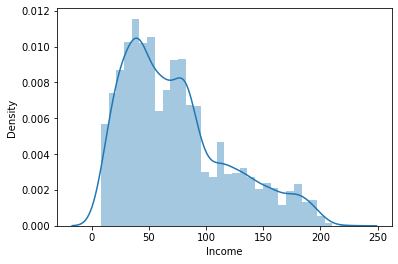

In [16]:
sns.distplot(data.Income)

<AxesSubplot:xlabel='Income'>

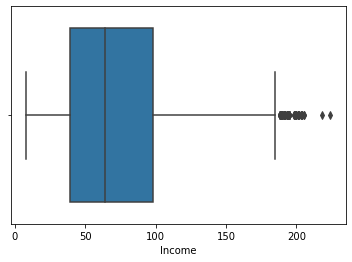

In [17]:
sns.boxplot(data.Income)

There are quite a few outliers in Income. The data is right skewed and all outliers lie on the right.

<AxesSubplot:xlabel='Experience', ylabel='Density'>

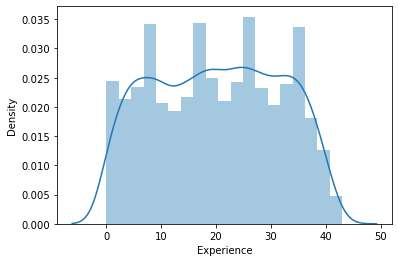

In [18]:
sns.distplot(data.Experience)

<AxesSubplot:xlabel='Experience'>

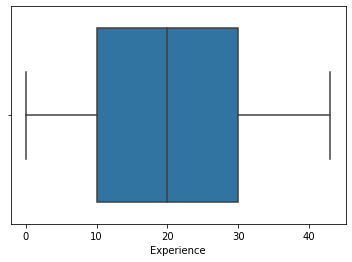

In [19]:
sns.boxplot(data.Experience)

Data is evenly distributed. No outliers.

<AxesSubplot:xlabel='CCAvg', ylabel='Density'>

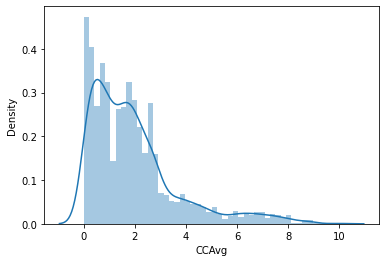

In [20]:
sns.distplot(data.CCAvg)

<AxesSubplot:xlabel='CCAvg'>

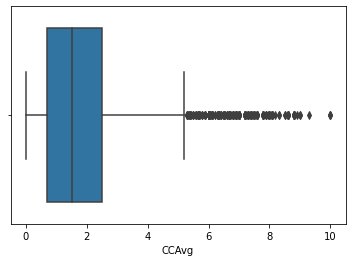

In [21]:
sns.boxplot(data.CCAvg)

In [22]:
data.CCAvg.mode()

0    0.3
dtype: float64

Most people have less than 500$ Avg. spending on credit cards per month. But there are a lot of outliers on the higher side too.

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

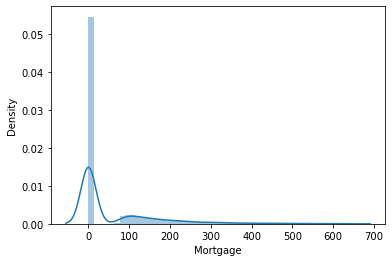

In [23]:
sns.distplot(data.Mortgage)

##### There are a lot of people that do not pay any Mortgage

<AxesSubplot:xlabel='Mortgage', ylabel='Density'>

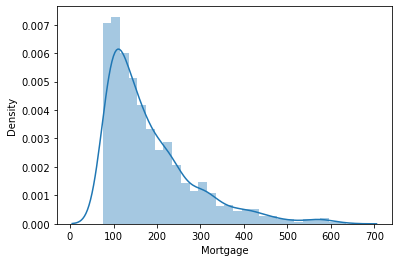

In [24]:
has_morg = data['Mortgage'][data['Mortgage'] != 0]
sns.distplot(has_morg)

<AxesSubplot:xlabel='Mortgage'>

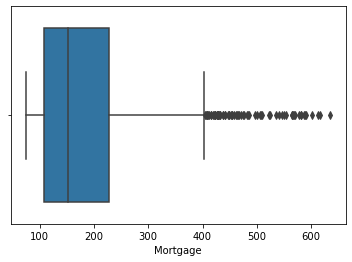

In [25]:
sns.boxplot(has_morg)

We are going to leave the outliers as they are because they can provide some insight.

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

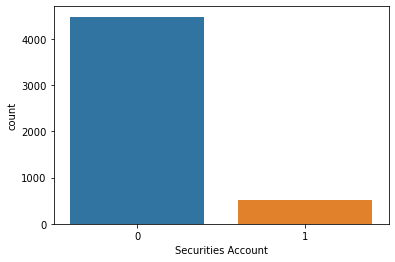

In [26]:
sns.countplot(data['Securities Account'])

##### Very few people have Securities Account

<AxesSubplot:xlabel='CD Account', ylabel='count'>

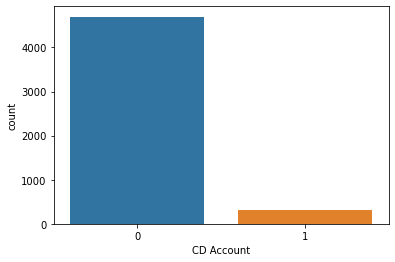

In [27]:
sns.countplot(data['CD Account'])

##### Very few people have CD Accoune

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

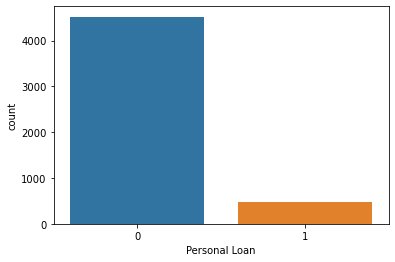

In [28]:
sns.countplot(data['Personal Loan'])

##### Few people have taken Personal Loan last time. This also indicates class inbalance. i.e. There are fewer entries on which our model can train for successful outcome(individual takes a Personal Loan) compared to the unsuccesful one(individual does not take a Personal Loan)

<AxesSubplot:xlabel='Online', ylabel='count'>

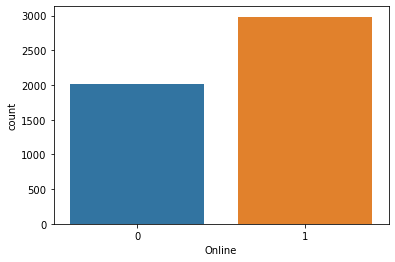

In [29]:
sns.countplot(data['Online'])

##### Most people prefer to use internet banking facilities.

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

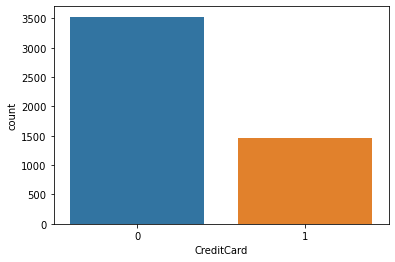

In [30]:
sns.countplot(data['CreditCard'])

##### Resonable amount of people use Creditcard facilities however most dont.

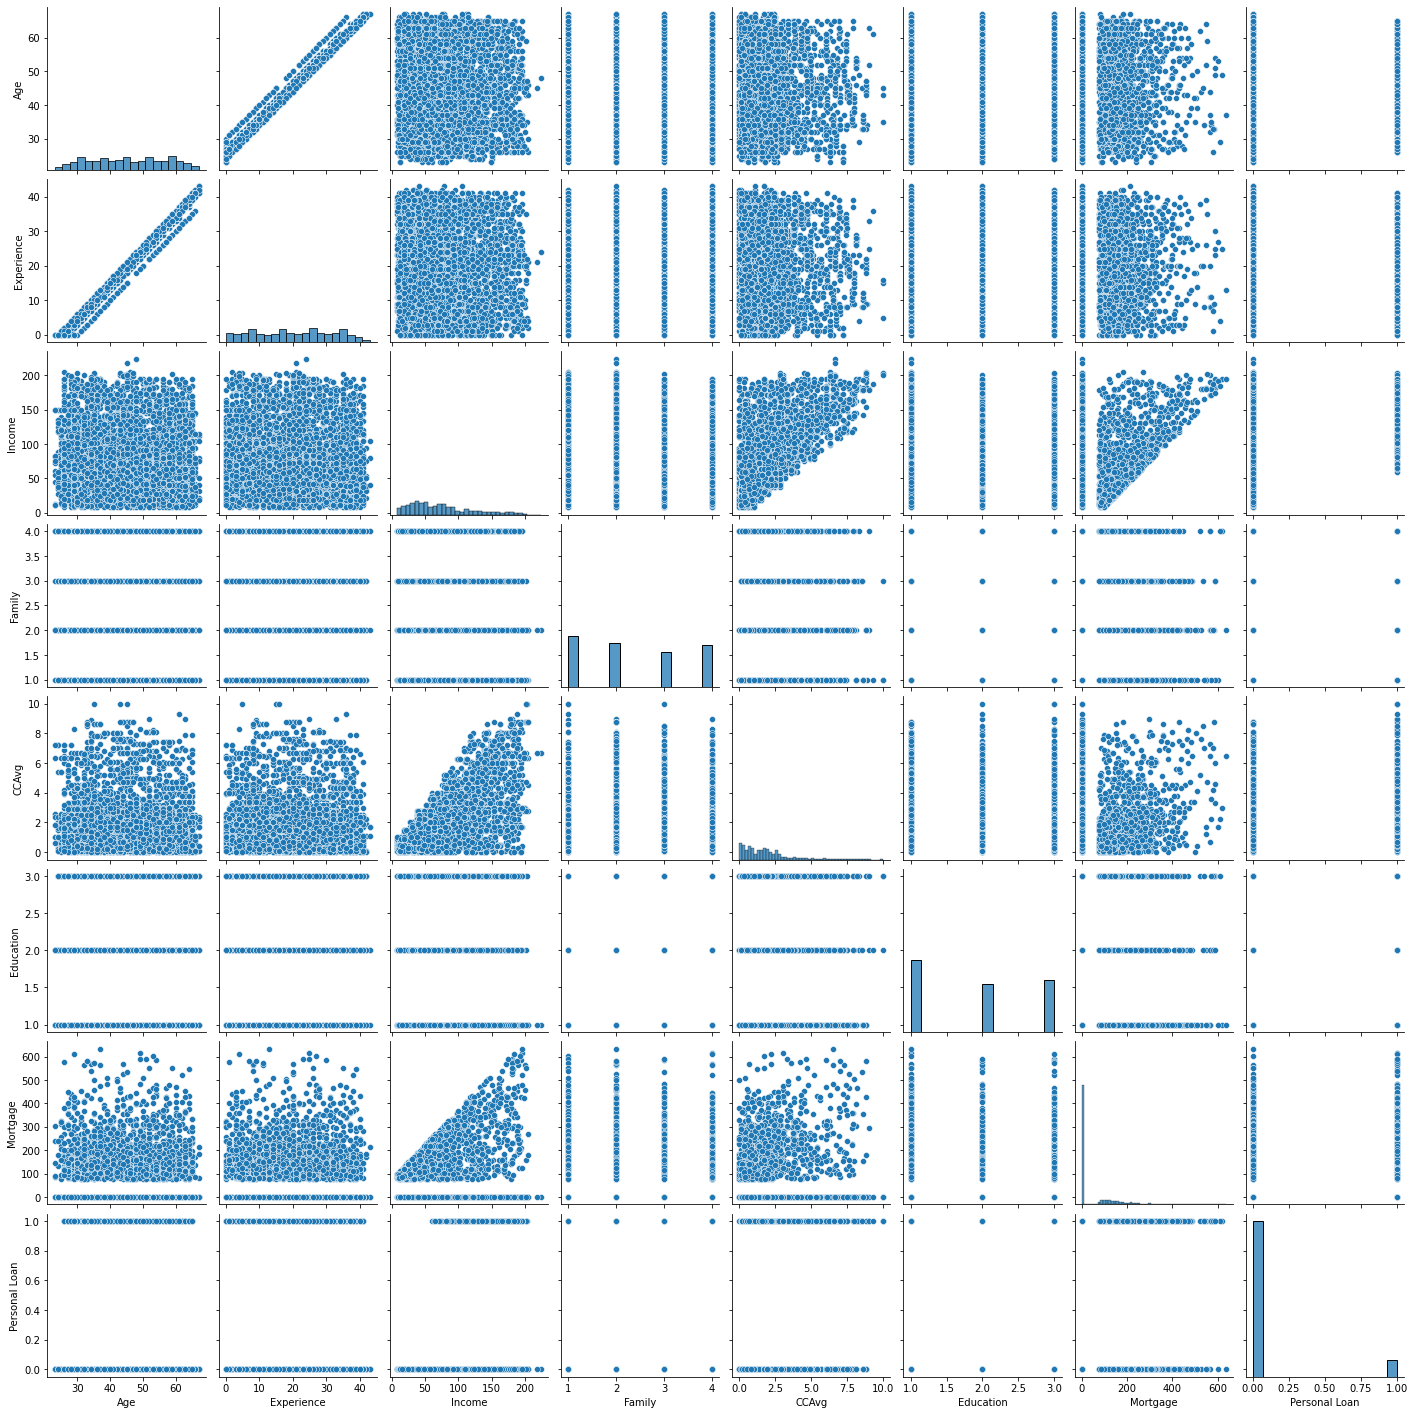

In [31]:
continious_data = data[["Age","Experience","Income","Family","CCAvg","Education","Mortgage","Personal Loan"]]
sns.pairplot(continious_data)

<AxesSubplot:>

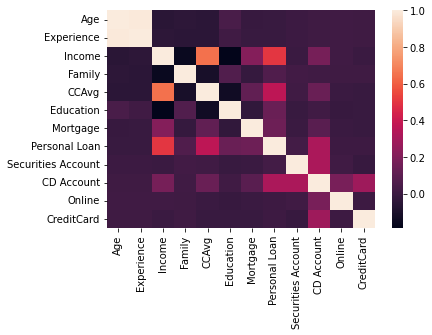

In [32]:
sns.heatmap(data.corr())

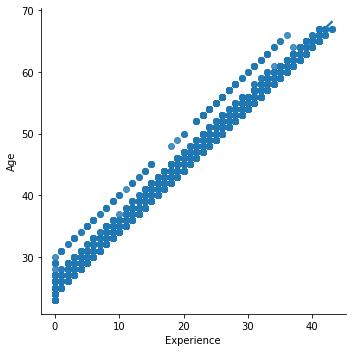

In [33]:
sns.lmplot(data = data, x = 'Experience', y = 'Age')

Notice that 'Income' and other attributes have relationship that is not really linear but linear regretion will provide some usefull information.
Also, Age and Experience have a very strong linear relationship. We can drop one of these as the provide the same variance to the model.

In [34]:
data.drop(['Age'], axis=1, inplace=True)

In [35]:
data["Personal Loan"][data["Personal Loan"] == 1].count()

480

In [36]:
data["Personal Loan"][data["Personal Loan"] == 0].count()

4520

Most people do not opt for personal loan. 

<AxesSubplot:xlabel='Experience', ylabel='Density'>

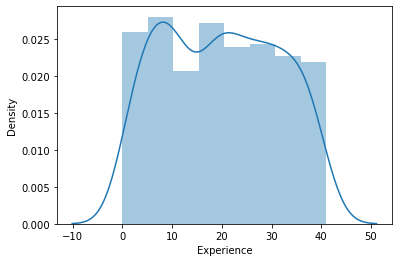

In [37]:
sns.distplot(data['Experience'][data['Personal Loan'] == 1], kde = True)

<AxesSubplot:xlabel='Experience', ylabel='Density'>

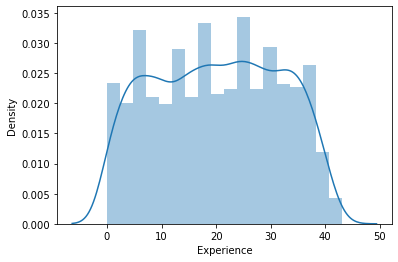

In [38]:
sns.distplot(data['Experience'][data['Personal Loan'] == 0], kde = True)

<AxesSubplot:xlabel='Income', ylabel='Density'>

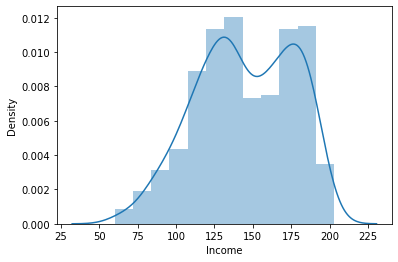

In [39]:
sns.distplot(data['Income'][data['Personal Loan']==1] , kde = True)

##### People with income of above 100 are more likely to take a personal loan

In [40]:
data.corr()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Experience,1.000000,-0.046729,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.046729,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.052213,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.049912,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.013536,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.010840,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007858,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.001111,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.010046,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013975,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210


##### Age and experience have varry strong correlation and Income has a correlation of around 0.6 with CCAvg and around 0.5 with Personal Loan

In [156]:
data[["Income", "CCAvg"]].corr()

,Income,CCAvg
Income,1.000000,0.645984
CCAvg,0.645984,1.000000


In [42]:
data[["Income", "Personal Loan"]].corr()

,Income,Personal Loan
Income,1.000000,0.502462
Personal Loan,0.502462,1.000000


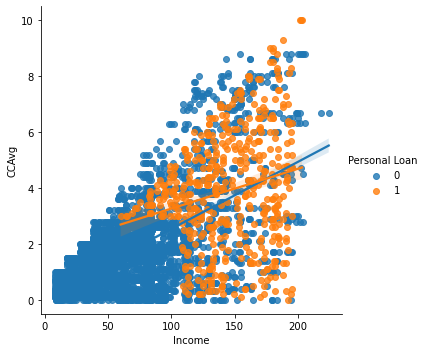

In [43]:
sns.lmplot(data = data, x = 'Income', y = 'CCAvg', hue="Personal Loan")

#### Peopel with income higher than 50 tend to take personal loans, regardless of their CCAvg

<AxesSubplot:xlabel='Family', ylabel='Count'>

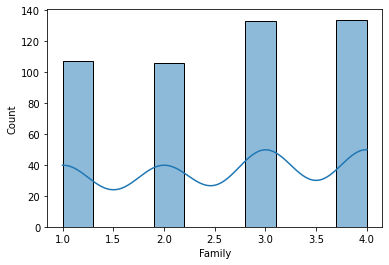

In [44]:
sns.histplot(data['Family'][data['Personal Loan']==1], kde = True)

#### People with family of 3 or 4 tend to opt for personal loan more

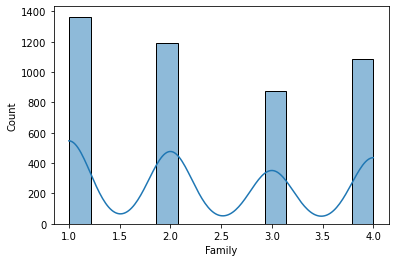

In [45]:
import warnings
sns.histplot(data['Family'][data['Personal Loan']==0], kde = True)
warnings.filterwarnings("ignore")

#### Single person in a family is slightly less likely to opt for Personal Loan
## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop(['Personal Loan'], axis=1)
Y = data['Personal Loan']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.50, random_state=1)

In [47]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4000, 10)
(500, 10)
(500, 10)


## Up-Samplling

In [48]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy =1, k_neighbors = 5, random_state = 1)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

## Scalling the model

In [49]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline as pi

scaler = preprocessing.StandardScaler()

pipe = pi([
    ('scaler', scaler)
])

X_train_scaler = pipe.fit_transform(X_train_res)
X_val_scaler = pipe.transform(X_val)
X_test_scaler = pipe.transform(X_test)


Y_train_scaler = Y_train_res

## LogisticRegression

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


newton-cg
Accuracy: Train_Data = 0.8973756906077348  Test_Data = 0.878
Loss Function: 0.2725698423555725


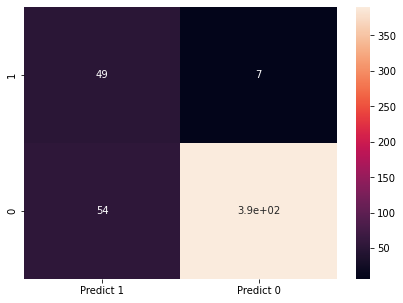

              precision    recall  f1-score   support

           1       0.48      0.88      0.62        56
           0       0.98      0.88      0.93       444

    accuracy                           0.88       500
   macro avg       0.73      0.88      0.77       500
weighted avg       0.93      0.88      0.89       500

[[ 0.07107265  2.76394664  0.42315502  0.59496871  0.70336808  0.10532285
  -0.64838144  0.85939452 -0.59291192 -0.85434457]]
__________________________________________________________________________________________
convergence after 24 epochs took 0 seconds
sag
Accuracy: Train_Data = 0.8973756906077348  Test_Data = 0.878
Loss Function: 0.27259041511172993


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


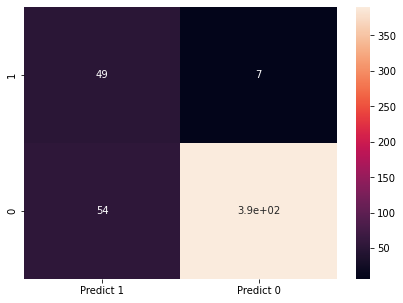

              precision    recall  f1-score   support

           1       0.48      0.88      0.62        56
           0       0.98      0.88      0.93       444

    accuracy                           0.88       500
   macro avg       0.73      0.88      0.77       500
weighted avg       0.93      0.88      0.89       500

[[ 0.07111558  2.76399434  0.42324981  0.59505259  0.70344226  0.10524088
  -0.64838669  0.85937906 -0.59293674 -0.85428478]]
__________________________________________________________________________________________
convergence after 13 epochs took 1 seconds
saga
Accuracy: Train_Data = 0.8973756906077348  Test_Data = 0.878
Loss Function: 0.27257956129579863


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


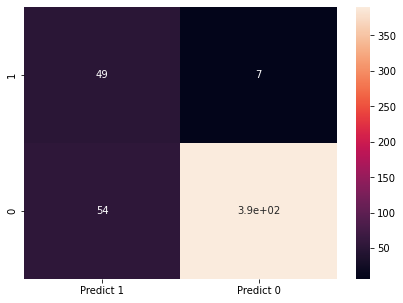

              precision    recall  f1-score   support

           1       0.48      0.88      0.62        56
           0       0.98      0.88      0.93       444

    accuracy                           0.88       500
   macro avg       0.73      0.88      0.77       500
weighted avg       0.93      0.88      0.89       500

[[ 0.07095985  2.76388065  0.42331766  0.59509412  0.70340865  0.10538245
  -0.64827982  0.85966101 -0.59301748 -0.85437688]]
__________________________________________________________________________________________
lbfgs
Accuracy: Train_Data = 0.8973756906077348  Test_Data = 0.878
Loss Function: 0.2725695543766965


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


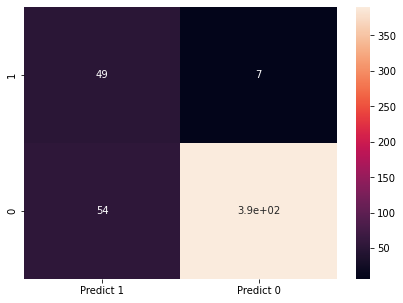

              precision    recall  f1-score   support

           1       0.48      0.88      0.62        56
           0       0.98      0.88      0.93       444

    accuracy                           0.88       500
   macro avg       0.73      0.88      0.77       500
weighted avg       0.93      0.88      0.89       500

[[ 0.07107547  2.76394189  0.42315765  0.59497234  0.70337113  0.10532277
  -0.64837276  0.85939126 -0.59291108 -0.85434001]]
__________________________________________________________________________________________
[LibLinear]liblinear
Accuracy: Train_Data = 0.8975138121546962  Test_Data = 0.878
Loss Function: 0.2725987724695617


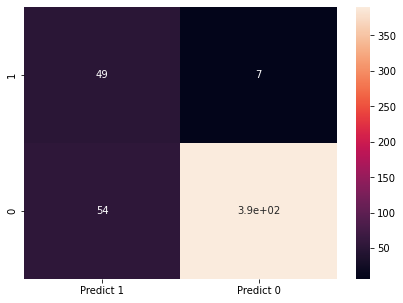

              precision    recall  f1-score   support

           1       0.48      0.88      0.62        56
           0       0.98      0.88      0.93       444

    accuracy                           0.88       500
   macro avg       0.73      0.88      0.77       500
weighted avg       0.93      0.88      0.89       500

[[ 0.07113708  2.76374115  0.42316569  0.59498405  0.70327498  0.10522555
  -0.64822939  0.85935345 -0.59283834 -0.85429675]]
__________________________________________________________________________________________


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from sklearn.metrics import log_loss
b = "\033[1m"
ub = "\033[0;0m"


solver = ['newton-cg', 'sag', 'saga', 'lbfgs', 'liblinear']
for i in solver:
    if i in ['newton-cg', 'sag']:
        model = LogisticRegression(solver=i,verbose=2,n_jobs=None)
    else: 
        model = LogisticRegression(solver=i,verbose=2)
    model.fit(X_train_scaler, Y_train_scaler)
    print(b+i+ub)
    print("Accuracy: Train_Data =",model.score(X_train_scaler, Y_train_scaler)," Test_Data =",model.score(X_test_scaler, Y_test))
    Y_predict = model.predict(X_test_scaler)
    proba1 = model.predict_proba(X_test_scaler)
    print(b+"Loss Function:"+ub,log_loss(Y_test, proba1))
    
    cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True)
    plt.show()
    print(metrics.classification_report(Y_test, Y_predict, labels=[1, 0]))
    print(model.coef_)
    print("__________________________________________________________________________________________")

### As the focus of this model is to target positives(1) more accurately, class 1 shoud have higher accuracy,precision, recall and F1-score. 
#### All the solvers provide almost similar results. They have 88% accuracy and 81% recall for 1 in its pridictions. However, their precision and F1-score is not high.
#### We want maximum recall possible to ensure most if the class 1 are identified correctly which will maximise the profit.

In [51]:
for i in np.geomspace(1e-5, 1e5, 20):
    model = LogisticRegression(solver='liblinear', verbose=2, C=i)
    model.fit(X_train_scaler, Y_train_scaler)
    
    proba = model.predict_proba(X_val_scaler)
    print('C = ',i,b+"Loss-Function:"+ub,log_loss(Y_val, proba))

[LibLinear]C =  1e-05 Loss-Function: 0.6772587108571554
[LibLinear]C =  3.359818286283781e-05 Loss-Function: 0.6453911865246291
[LibLinear]C =  0.00011288378916846884 Loss-Function: 0.5750510770447064
[LibLinear]C =  0.000379269019073225 Loss-Function: 0.48153035174545367
[LibLinear]C =  0.0012742749857031334 Loss-Function: 0.40906117648209495
[LibLinear]C =  0.004281332398719391 Loss-Function: 0.369652299642345
[LibLinear]C =  0.01438449888287663 Loss-Function: 0.3551641108306352
[LibLinear]C =  0.04832930238571752 Loss-Function: 0.35405623533201264
[LibLinear]C =  0.1623776739188721 Loss-Function: 0.35580233927822635
[LibLinear]C =  0.5455594781168515 Loss-Function: 0.35680601275171053
[LibLinear]C =  1.8329807108324339 Loss-Function: 0.3571687546449151
[LibLinear]C =  6.1584821106602545 Loss-Function: 0.35728323585864824
[LibLinear]C =  20.6913808111479 Loss-Function: 0.3573179125628892
[LibLinear]C =  69.51927961775606 Loss-Function: 0.3573282877050832
[LibLinear]C =  233.572146909

[LibLinear]Accuracy: Train_Data = 0.8973756906077348  Test_Data = 0.878
              precision    recall  f1-score   support

           1       0.48      0.88      0.62        56
           0       0.98      0.88      0.93       444

    accuracy                           0.88       500
   macro avg       0.73      0.88      0.77       500
weighted avg       0.93      0.88      0.89       500



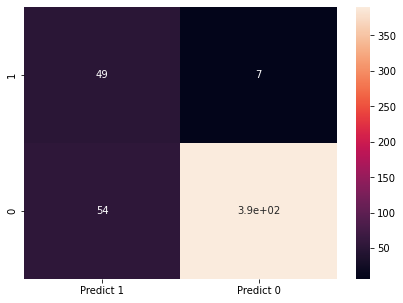

In [52]:
c=1.8329
model = LogisticRegression(solver='liblinear', verbose=2, C=c)
model.fit(X_train_scaler, Y_train_scaler)
print("Accuracy: Train_Data =",model.score(X_train_scaler, Y_train_scaler)," Test_Data =",model.score(X_test_scaler, Y_test))
cm=metrics.confusion_matrix(Y_test, Y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
print(metrics.classification_report(Y_test, Y_predict, labels=[1, 0]))

### Changing the value of C also gave the similar results in accuracy, precision, recall and F1-score.

## GaussianNB

Accuracy: Train_Data = 0.8893646408839779  Test_Data = 0.864
              precision    recall  f1-score   support

           1       0.44      0.73      0.55        56
           0       0.96      0.88      0.92       444

    accuracy                           0.86       500
   macro avg       0.70      0.81      0.73       500
weighted avg       0.90      0.86      0.88       500

Confusion Matrix


<AxesSubplot:>

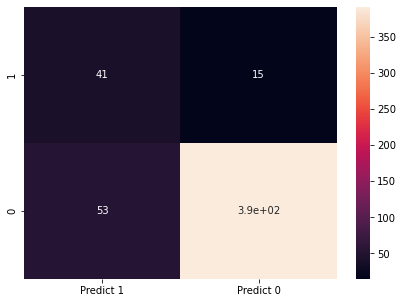

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
NBmodel = GaussianNB()
NBmodel.fit(X_train_scaler, Y_train_scaler)

print("Accuracy: Train_Data =",NBmodel.score(X_train_scaler, Y_train_scaler)," Test_Data =",NBmodel.score(X_test_scaler, Y_test))

NBpredict = NBmodel.predict(X_test_scaler)
print(metrics.classification_report(Y_test, NBpredict, labels=[1, 0]))

print(b+"Confusion Matrix"+ub)
cm=metrics.confusion_matrix(Y_test, NBpredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### It has 85% accuracy in its pridictions. Even though this model has high accuracy, its precision, recall and F1-score for class 1 is too low.
### The performance of this model is not as  good as Logistic Regression model.
## GridSearchCV

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.0)
Accuracy: Train_Data = 0.899171270718232  Test_Data = 0.862
              precision    recall  f1-score   support

           1       0.43      0.75      0.55        56
           0       0.97      0.88      0.92       444

    accuracy                           0.86       500
   macro avg       0.70      0.81      0.73       500
weighted avg       0.91      0.86      0.88       500

Confusion Matrix


<AxesSubplot:>

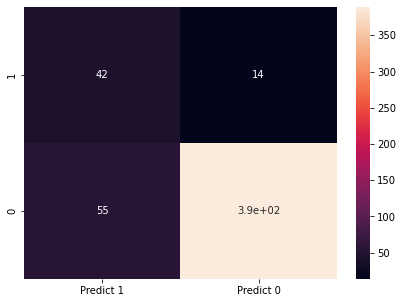

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_scaler, Y_train_scaler)
print(nbModel_grid.best_estimator_)

print("Accuracy: Train_Data =",nbModel_grid.score(X_train_scaler, Y_train_scaler)," Test_Data =",nbModel_grid.score(X_test_scaler, Y_test))

nbpredict = nbModel_grid.predict(X_test_scaler)
print(metrics.classification_report(Y_test, nbpredict, labels=[1, 0]))

print(b+"Confusion Matrix"+ub)
cm=metrics.confusion_matrix(Y_test, nbpredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### The model is still not performing better than Logistic Regression.

## KNN Model

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 4 , weights = 'distance' )
knn.fit(X_train_scaler, Y_train_scaler)

KNNmodel_score = knn.score(X_train_scaler, Y_train_scaler)
print(KNNmodel_score)

KNNmodel_score = knn.score(X_test_scaler, Y_test)
print(KNNmodel_score)

1.0
0.934


#### It has 92% accuracy in its pridictions

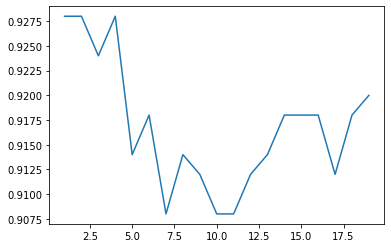

In [56]:
scores = []
for k in range(1,20):
    NNH2 = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
    NNH2.fit(X_train_scaler, Y_train_scaler)
    scores.append(NNH2.score(X_val_scaler,Y_val))
plt.plot(range(1,20),scores)

###### The highest accuract is when k value is 4

Confusion Matrix
              precision    recall  f1-score   support

           1       0.67      0.82      0.74        56
           0       0.98      0.95      0.96       444

    accuracy                           0.93       500
   macro avg       0.82      0.88      0.85       500
weighted avg       0.94      0.93      0.94       500



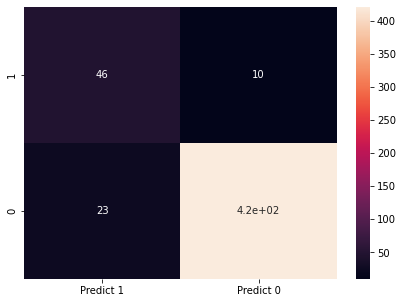

In [57]:
KNNpredict = knn.predict(X_test_scaler)
print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, KNNpredict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

print(metrics.classification_report(Y_test, KNNpredict, labels=[1, 0]))

#### This model gives highest values for precision, recall and f1-score.

In [58]:
X_train.shape

(4000, 10)

##  K-Fold on KNN

In [59]:
from sklearn.model_selection import KFold, cross_val_score
Kfold = KFold(n_splits=7, random_state=7, shuffle=True)
cv = cross_val_score(knn, X_train_scaler, Y_train_scaler, cv = Kfold)

print(cv)
print("Mean: ",cv.mean(), "Std: ", cv.std())

[0.95942029 0.97294686 0.97388781 0.96905222 0.97001934 0.97098646
 0.9622824 ]
Mean:  0.9683707699433878 Std:  0.005050908639134406


#### Comparinf each models Precision and Recall and Accuracy, Logistic Regression provides the best model for prediction.

## Dummy Model

Accuracy: Train_Data = 0.5022099447513813  Test_Data = 0.524
Loss Function: 17.960163725353556


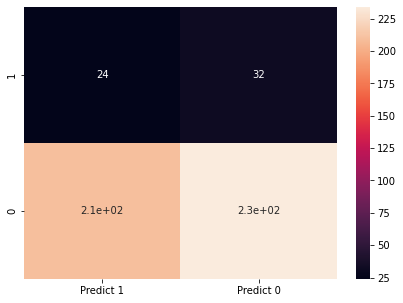

              precision    recall  f1-score   support

           1       0.10      0.43      0.17        56
           0       0.88      0.53      0.66       444

    accuracy                           0.52       500
   macro avg       0.49      0.48      0.41       500
weighted avg       0.79      0.52      0.60       500



In [60]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train_scaler, Y_train_scaler)
print("Accuracy: Train_Data =",dummy.score(X_train_scaler, Y_train_scaler)," Test_Data =",dummy.score(X_test_scaler, Y_test))
Y_predictD = dummy.predict(X_test_scaler)
probaDummy = dummy.predict_proba(X_test_scaler)
print(b+"Loss Function:"+ub,log_loss(Y_test, probaDummy))
    
cm=metrics.confusion_matrix(Y_test, Y_predictD, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(metrics.classification_report(Y_test, Y_predictD, labels=[1, 0]))

## SVM

Accuracy: Train_Data = 0.962707182320442  Test_Data = 0.942


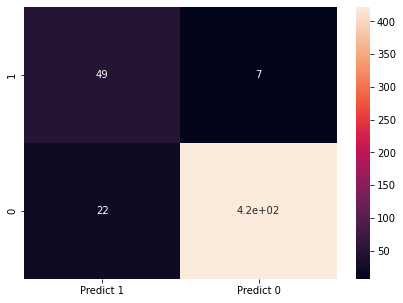

              precision    recall  f1-score   support

           1       0.69      0.88      0.77        56
           0       0.98      0.95      0.97       444

    accuracy                           0.94       500
   macro avg       0.84      0.91      0.87       500
weighted avg       0.95      0.94      0.94       500



In [145]:
from sklearn import svm
csv = svm.SVC(probability = True)
csv.fit(X_train_scaler, Y_train_scaler)
print("Accuracy: Train_Data =",csv.score(X_train_scaler, Y_train_scaler)," Test_Data =",csv.score(X_test_scaler, Y_test))
Y_predict_csv = csv.predict(X_test_scaler)
    
cm=metrics.confusion_matrix(Y_test, Y_predict_csv, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(metrics.classification_report(Y_test, Y_predict_csv, labels=[1, 0]))

### Hyper-parameter tunning

In [62]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}
 
csv_grid = GridSearchCV(csv, param_grid, refit = True, verbose = 3)
csv_grid.fit(X_train_scaler, Y_train_scaler)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   5.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   6.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   5.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   5.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.948 total time=   6.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   2.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.944 total time=   2.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.944 total time=   2.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.941 total time=   2.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   2.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.892 total time=   2.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

#### C=1 and gamma=0.1 gives the highest accuracy so lets check the SVC model with these parameters.
###  Kfold

In [63]:
csv2 = svm.SVC(C=1, gamma=0.1, verbose=3)
cv_csv = cross_val_score(csv2, X_train_scaler, Y_train_scaler, cv = Kfold)

print(cv)
print("Mean: ",cv.mean(), "Std: ", cv.std())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.95942029 0.97294686 0.97388781 0.96905222 0.97001934 0.97098646
 0.9622824 ]
Mean:  0.9683707699433878 Std:  0.005050908639134406


[LibSVM]Accuracy: Train_Data = 0.962707182320442  Test_Data = 0.942


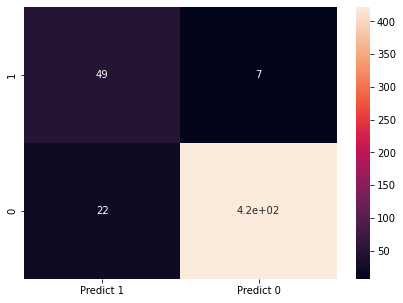

              precision    recall  f1-score   support

           1       0.69      0.88      0.77        56
           0       0.98      0.95      0.97       444

    accuracy                           0.94       500
   macro avg       0.84      0.91      0.87       500
weighted avg       0.95      0.94      0.94       500



In [64]:
csv2.fit(X_train_scaler, Y_train_scaler)

print("Accuracy: Train_Data =",csv2.score(X_train_scaler, Y_train_scaler)," Test_Data =",csv2.score(X_test_scaler, Y_test))
Y_predict_csv2 = csv2.predict(X_test_scaler)

cm=metrics.confusion_matrix(Y_test, Y_predict_csv2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(metrics.classification_report(Y_test, Y_predict_csv2, labels=[1, 0]))

#### Changing the hyperparameters has not impacted the outcome substancially.
## Descision Tree

Accuracy: Train_Data = 0.9904696132596685  Test_Data = 0.972


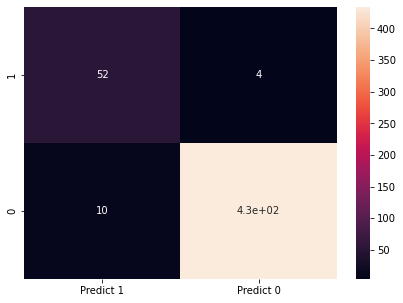

              precision    recall  f1-score   support

           1       0.84      0.93      0.88        56
           0       0.99      0.98      0.98       444

    accuracy                           0.97       500
   macro avg       0.91      0.95      0.93       500
weighted avg       0.97      0.97      0.97       500



In [65]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train_scaler, Y_train_scaler)

print("Accuracy: Train_Data =",tree.score(X_train_scaler, Y_train_scaler)," Test_Data =",tree.score(X_test_scaler, Y_test))
Y_predict_tree = tree.predict(X_test_scaler)
    
cm=metrics.confusion_matrix(Y_test, Y_predict_tree, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(metrics.classification_report(Y_test, Y_predict_tree, labels=[1, 0]))

In [66]:
tree.get_depth()

10

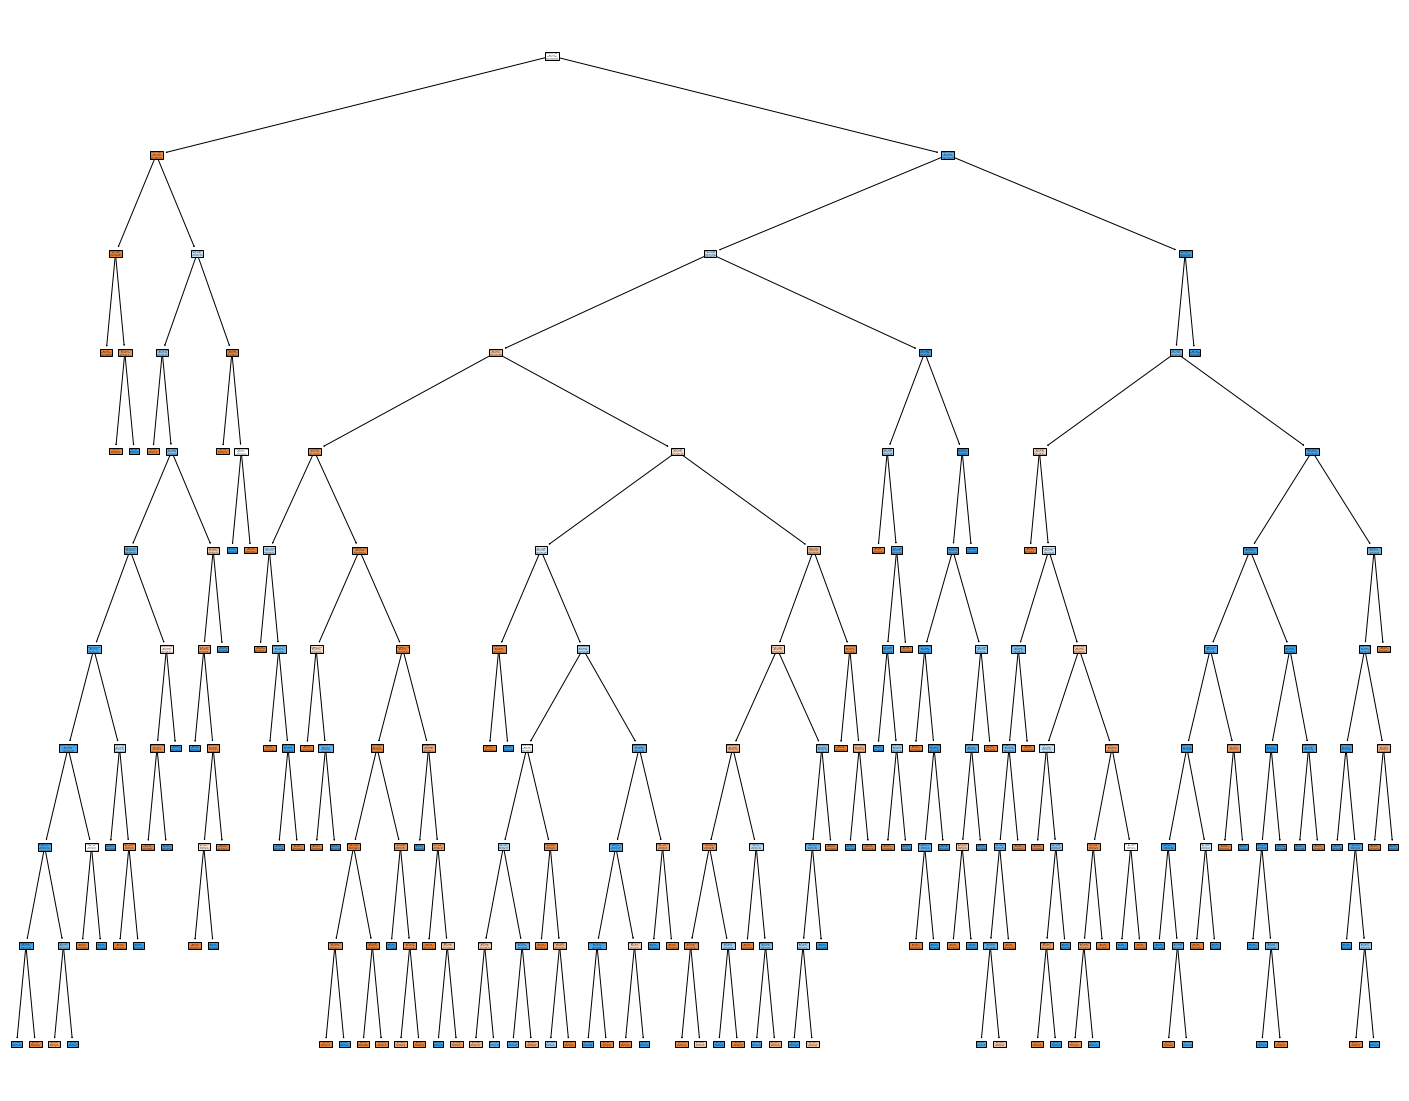

In [67]:
from sklearn import tree as t
fig = plt.figure(figsize=(25,20))
_ = t.plot_tree(tree,
                   feature_names=X.columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)

## Ramdom Forest Classifier

Accuracy: Train_Data = 1.0  Test_Data = 0.978


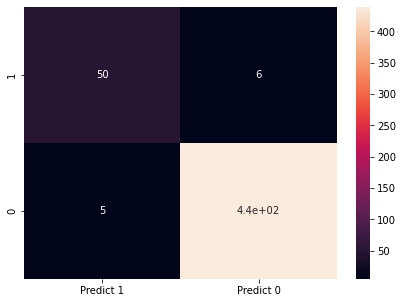

              precision    recall  f1-score   support

           1       0.91      0.89      0.90        56
           0       0.99      0.99      0.99       444

    accuracy                           0.98       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.98      0.98      0.98       500



In [68]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy')
forest.fit(X_train_scaler, Y_train_scaler)

print("Accuracy: Train_Data =",forest.score(X_train_scaler, Y_train_scaler)," Test_Data =",forest.score(X_test_scaler, Y_test))
Y_predict_forest = forest.predict(X_test_scaler)
    
cm=metrics.confusion_matrix(Y_test, Y_predict_forest, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(metrics.classification_report(Y_test, Y_predict_forest, labels=[1, 0]))

## GradientBoostingClassifier

Accuracy: Train_Data = 0.9812154696132597  Test_Data = 0.97


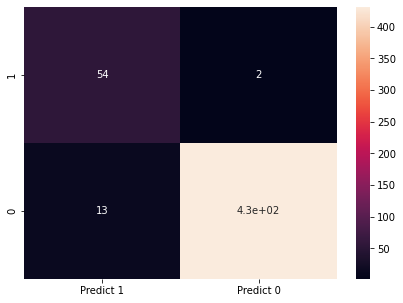

              precision    recall  f1-score   support

           1       0.81      0.96      0.88        56
           0       1.00      0.97      0.98       444

    accuracy                           0.97       500
   macro avg       0.90      0.97      0.93       500
weighted avg       0.97      0.97      0.97       500



In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaler, Y_train_scaler)

print("Accuracy: Train_Data =",gbc.score(X_train_scaler, Y_train_scaler)," Test_Data =",gbc.score(X_test_scaler, Y_test))
Y_predict_gbc = gbc.predict(X_test_scaler)
    
cm=metrics.confusion_matrix(Y_test, Y_predict_gbc, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(metrics.classification_report(Y_test, Y_predict_gbc, labels=[1, 0]))

In [70]:
Y_pridict_gbc_proba = gbc.predict_proba(X_test_scaler)

print(Y_pridict_gbc_proba)

[[0.99477891 0.00522109]
 [0.9931856  0.0068144 ]
 [0.00496618 0.99503382]
 [0.99813293 0.00186707]
 [0.46602778 0.53397222]
 [0.04572793 0.95427207]
 [0.00431682 0.99568318]
 [0.96902892 0.03097108]
 [0.7253915  0.2746085 ]
 [0.9961816  0.0038184 ]
 [0.99290276 0.00709724]
 [0.85910058 0.14089942]
 [0.99631678 0.00368322]
 [0.99620587 0.00379413]
 [0.9978382  0.0021618 ]
 [0.28451777 0.71548223]
 [0.99665436 0.00334564]
 [0.9960468  0.0039532 ]
 [0.99759935 0.00240065]
 [0.99612021 0.00387979]
 [0.99533812 0.00466188]
 [0.95704966 0.04295034]
 [0.99599958 0.00400042]
 [0.99533812 0.00466188]
 [0.99880715 0.00119285]
 [0.99697924 0.00302076]
 [0.99017217 0.00982783]
 [0.99672319 0.00327681]
 [0.92970143 0.07029857]
 [0.9957221  0.0042779 ]
 [0.00816236 0.99183764]
 [0.99643197 0.00356803]
 [0.99643333 0.00356667]
 [0.99725205 0.00274795]
 [0.02845212 0.97154788]
 [0.99490928 0.00509072]
 [0.99643333 0.00356667]
 [0.71404373 0.28595627]
 [0.11590066 0.88409934]
 [0.91901855 0.08098145]


# XGBoost

Accuracy: Train_Data = 0.9998618784530386  Test_Data = 0.982


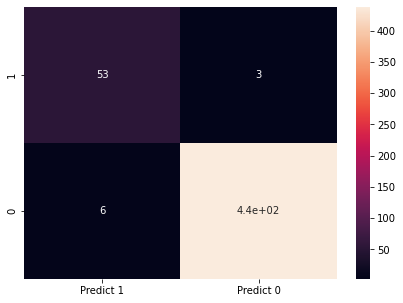

              precision    recall  f1-score   support

           1       0.90      0.95      0.92        56
           0       0.99      0.99      0.99       444

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [95]:
#!pip install xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaler, Y_train_scaler)

print("Accuracy: Train_Data =",xgb.score(X_train_scaler, Y_train_scaler)," Test_Data =",xgb.score(X_test_scaler, Y_test))
Y_predict_xgb = pd.Series(xgb.predict(X_test_scaler))
    
cm=metrics.confusion_matrix(Y_test, Y_predict_xgb, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
plt.show()
print(metrics.classification_report(Y_test, Y_predict_xgb, labels=[1, 0]))

In [96]:
Y_pridict_xgb_proba = xgb.predict_proba(X_test_scaler)

print(Y_pridict_xgb_proba)

[[9.99992788e-01 7.22189725e-06]
 [9.99656260e-01 3.43765394e-04]
 [1.20878220e-04 9.99879122e-01]
 [9.99987125e-01 1.28621159e-05]
 [9.07183886e-01 9.28161368e-02]
 [9.17792320e-04 9.99082208e-01]
 [5.01871109e-05 9.99949813e-01]
 [9.99269485e-01 7.30505446e-04]
 [9.93678570e-01 6.32141437e-03]
 [9.99987185e-01 1.28039355e-05]
 [9.99882102e-01 1.17885698e-04]
 [9.99300957e-01 6.99029653e-04]
 [9.99949157e-01 5.08326484e-05]
 [9.99996245e-01 3.75126046e-06]
 [9.99980509e-01 1.94861695e-05]
 [5.32462895e-01 4.67537105e-01]
 [9.99975681e-01 2.42905098e-05]
 [9.99978364e-01 2.16340704e-05]
 [9.99909639e-01 9.03561813e-05]
 [9.99625921e-01 3.74064955e-04]
 [9.99983191e-01 1.67846429e-05]
 [9.92736280e-01 7.26371631e-03]
 [9.99996960e-01 3.05100343e-06]
 [9.99974370e-01 2.56281983e-05]
 [9.99996662e-01 3.35443860e-06]
 [9.99988854e-01 1.11199643e-05]
 [9.99745786e-01 2.54198094e-04]
 [9.99957323e-01 4.26665465e-05]
 [9.98801947e-01 1.19804742e-03]
 [9.99984860e-01 1.51620952e-05]
 [1.947283

# AUC and ROC Curve (Managing Threshold)

In [139]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, th = roc_curve(Y_test, Y_pridict_xgb_proba[:,1])
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.99501287001287


In [148]:
csv_proba = csv.predict_proba(X_test_scaler)

fpr1, tpr1, th1 = roc_curve(Y_test, csv_proba[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

0.9803330115830116


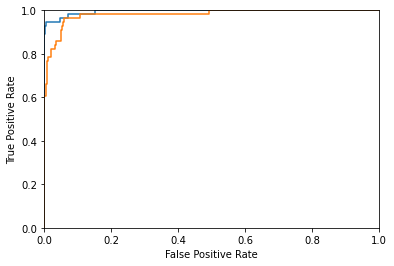

In [150]:
plt.clf()
plt.plot(fpr, tpr, label = 'ROC curve for XGBoost (area = %0.2f)' %roc_auc)
plt.plot(fpr1, tpr1, label = 'ROC curve for SVM (area = %0.2f)' %roc_auc1)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [151]:
th

array([1.99999714e+00, 9.99997139e-01, 9.28723335e-01, 8.67003202e-01,
       8.04658473e-01, 8.01714301e-01, 8.00464392e-01, 1.46353632e-01,
       1.25129372e-01, 3.60353366e-02, 3.44416797e-02, 1.61594979e-03,
       1.44266943e-03, 1.35718356e-03, 5.97764920e-05, 5.96309110e-05,
       3.69707304e-05, 3.64537773e-05, 1.39804933e-05, 1.38458463e-05,
       1.00829475e-05, 9.75315015e-06, 5.50846039e-07], dtype=float32)